In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [4]:
loan_data = pd.read_csv("Loan payments data.csv")

In [5]:
loan_data.dtypes


Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [6]:
loan_data.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [7]:
loan_data.tail(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [8]:
loan_data.shape

(500, 11)

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [10]:
loan_data.isnull().sum().sort_values(ascending=False)

past_due_days     300
paid_off_time     100
Loan_ID             0
Principal           0
loan_status         0
effective_date      0
terms               0
due_date            0
age                 0
education           0
Gender              0
dtype: int64

In [11]:
loan_data["effective_date"]=pd.to_datetime(loan_data["effective_date"], infer_datetime_format=True)
loan_data["due_date"]=pd.to_datetime(loan_data["due_date"],infer_datetime_format=True)
loan_data["paid_off_time"]=pd.to_datetime(loan_data["paid_off_time"],errors="coerce" ).dt.date.fillna(loan_data["paid_off_time"])
loan_data["paid_off_time"]=pd.to_datetime(loan_data["paid_off_time"],infer_datetime_format=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11000\3291597263.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  loan_data["effective_date"]=pd.to_datetime(loan_data["effective_date"], infer_datetime_format=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11000\3291597263.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  loan_data["due_date"]=pd.to_datetime(loan_data["due_date"],infer_datetime_format=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11000\3291597263.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed i

In [12]:
loan_data.dtypes

Loan_ID                   object
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
paid_off_time     datetime64[ns]
past_due_days            float64
age                        int64
education                 object
Gender                    object
dtype: object

In [13]:
loan_data["past_due_days"]=loan_data["paid_off_time"]-loan_data["due_date"]


In [14]:
loan_data["past_due_days"]=loan_data["past_due_days"].dt.days.astype(float)

In [15]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Loan_ID         500 non-null    object        
 1   loan_status     500 non-null    object        
 2   Principal       500 non-null    int64         
 3   terms           500 non-null    int64         
 4   effective_date  500 non-null    datetime64[ns]
 5   due_date        500 non-null    datetime64[ns]
 6   paid_off_time   400 non-null    datetime64[ns]
 7   past_due_days   400 non-null    float64       
 8   age             500 non-null    int64         
 9   education       500 non-null    object        
 10  Gender          500 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 43.1+ KB


In [16]:
loan_data=loan_data.dropna()

In [17]:
loan_data.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [18]:
loan_data.loan_status.value_counts()

loan_status
PAIDOFF               300
COLLECTION_PAIDOFF    100
Name: count, dtype: int64

In [19]:
paid_on_time =loan_data.loc[loan_data["past_due_days"]=="0 days"]


In [20]:
loan_data.Gender.value_counts()

Gender
male      333
female     67
Name: count, dtype: int64

In [21]:
loan_data.education.value_counts()

education
college                 181
High School or Below    160
Bechalor                 56
Master or Above           3
Name: count, dtype: int64

VISUALIZING THE DISTRIBUTION BETWEEN AGE AND LOAN STATUS

In [22]:
loan_data["age"].unique()

array([45, 50, 33, 27, 28, 35, 29, 36, 26, 39, 40, 32, 43, 25, 34, 31, 37,
       24, 21, 30, 22, 44, 46, 38, 23, 20, 47, 42, 19, 51, 41, 49])

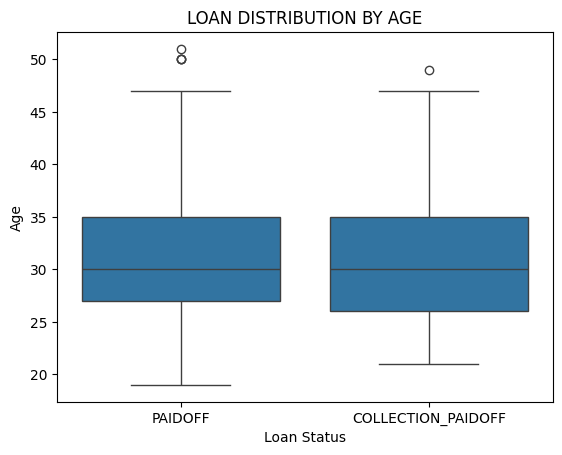

In [23]:
plt.Figure(figsize=(16,9))
sns.boxplot(x="loan_status",y="age",data=loan_data)
plt.title("LOAN DISTRIBUTION BY AGE")
plt.xlabel("Loan Status")
plt.ylabel("Age")
plt.show()

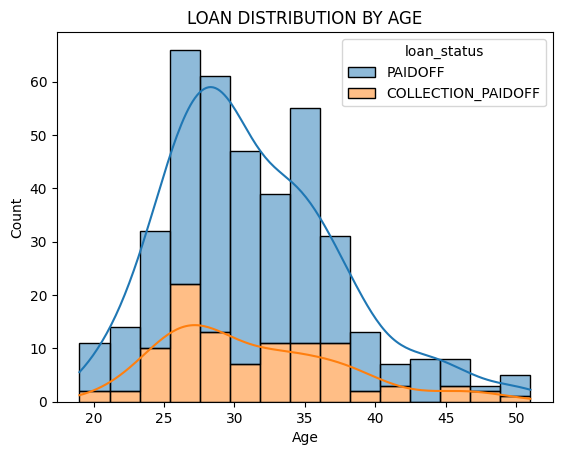

In [24]:
sns.histplot(x=loan_data["age"],hue=loan_data["loan_status"],kde=True,multiple="stack")
plt.title("LOAN DISTRIBUTION BY AGE")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

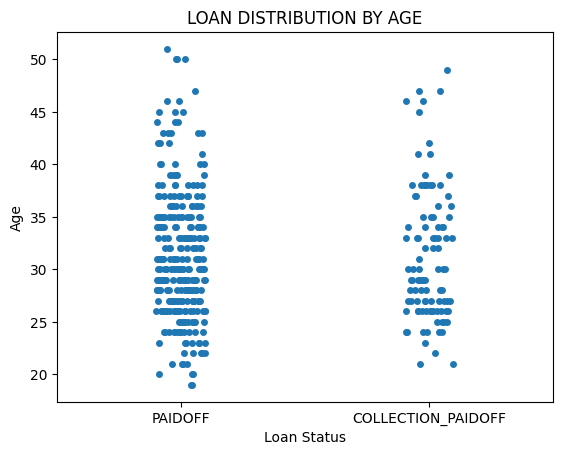

In [25]:
sns.stripplot(x="loan_status",y="age",data=loan_data,jitter=True)
plt.title("LOAN DISTRIBUTION BY AGE")
plt.xlabel("Loan Status")
plt.ylabel("Age")
plt.show()

In [26]:
lst = [loan_data]
for column in lst:
    column.loc[column["age"] < 30 , "age_group" ] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_group"] = 30
    column.loc[(column["age"] >= 40 ) & (column["age"] <= 49), "age_group"] = 40
    column.loc[column["age"] >= 50, "age_group"] = 50 

In [27]:
loan_data["age_group"]=loan_data["age_group"].astype(int)

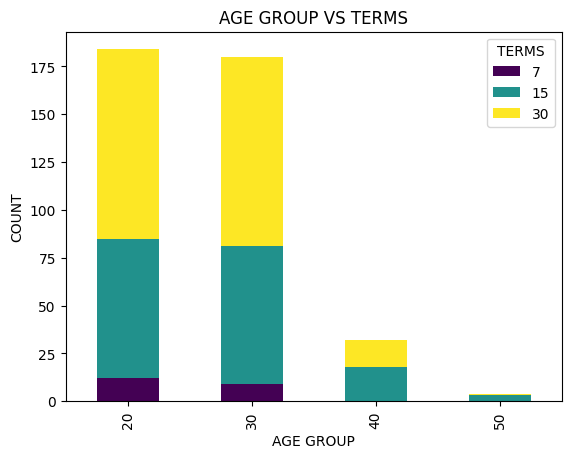

In [28]:
cross_tab=pd.crosstab(loan_data["age_group"],loan_data["terms"])
cross_tab.plot(kind="bar",stacked=True,colormap="viridis")
plt.title("AGE GROUP VS TERMS")
plt.xlabel("AGE GROUP")
plt.ylabel("COUNT") 
plt.legend(title="TERMS")
plt.show()

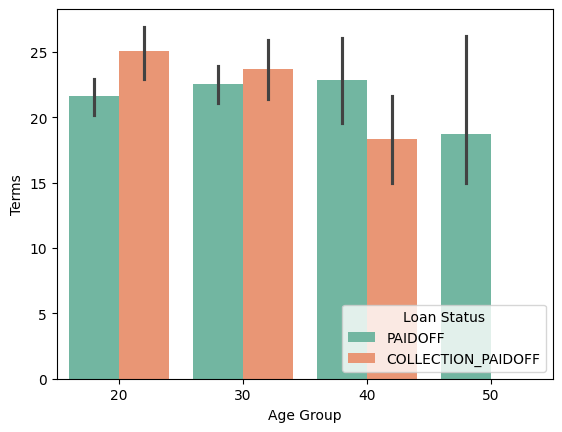

In [29]:
sns.barplot(x="age_group",y="terms",hue="loan_status",data=loan_data,palette="Set2")
plt.xlabel("Age Group")
plt.ylabel("Terms")
plt.legend(title="Loan Status")
plt.show()

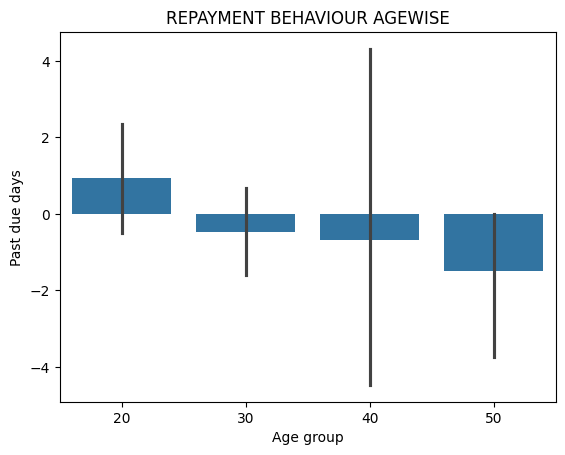

In [30]:
sns.barplot(x="age_group", y="past_due_days" ,data=loan_data)
plt.title("REPAYMENT BEHAVIOUR AGEWISE")
plt.xlabel("Age group")
plt.ylabel("Past due days")
plt.show()

VISUALISATION OF EDUCATION LEVEL AND ITS BEHAVIOUR WITH LOAN STATUS

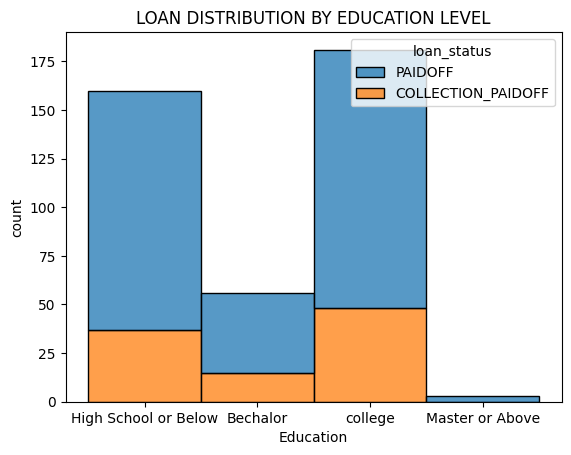

In [31]:

sns.histplot(x=loan_data["education"],hue=loan_data["loan_status"],multiple="stack")
plt.title("LOAN DISTRIBUTION BY EDUCATION LEVEL")
plt.xlabel("Education")
plt.ylabel("count")
plt.show()

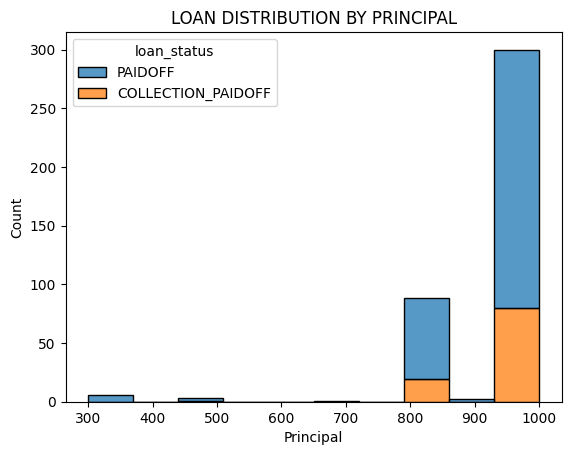

In [32]:
plt.Figure(figsize=(16,9))
sns.histplot(x=loan_data["Principal"],hue=loan_data["loan_status"],multiple="stack",bins=10)
plt.title("LOAN DISTRIBUTION BY PRINCIPAL") 
plt.xlabel("Principal")
plt.ylabel("Count")
plt.show()

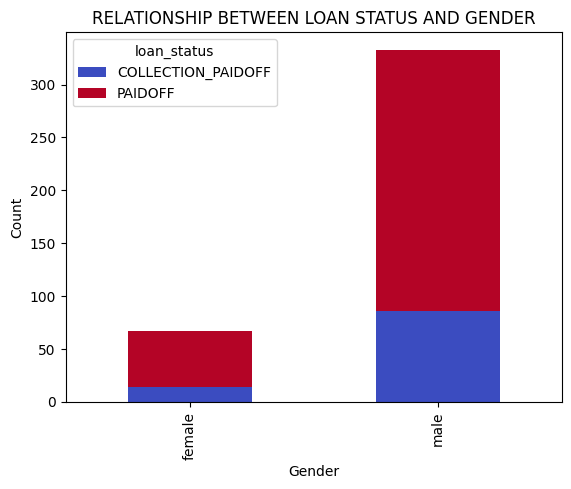

In [33]:
cross_tab=pd.crosstab(loan_data["Gender"],loan_data["loan_status"])
cross_tab.plot(kind="bar",stacked=True,colormap="coolwarm")
plt.title("RELATIONSHIP BETWEEN LOAN STATUS AND GENDER")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

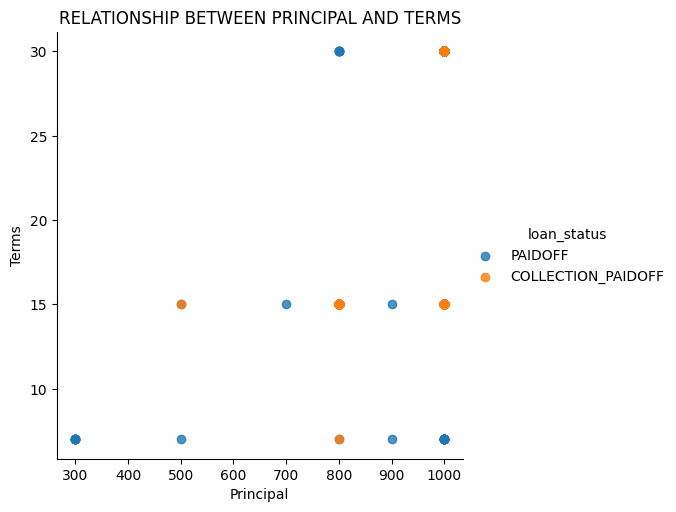

In [34]:
sns.lmplot(x="Principal",y="terms",hue="loan_status",data=loan_data,fit_reg=False)
plt.title("RELATIONSHIP BETWEEN PRINCIPAL AND TERMS")
plt.xlabel("Principal")
plt.ylabel("Terms")
plt.show()


In [35]:
loan_data["loan_status"]=loan_data["loan_status"].map(lambda x : 1 if x == "PAIDOFF" else 0)



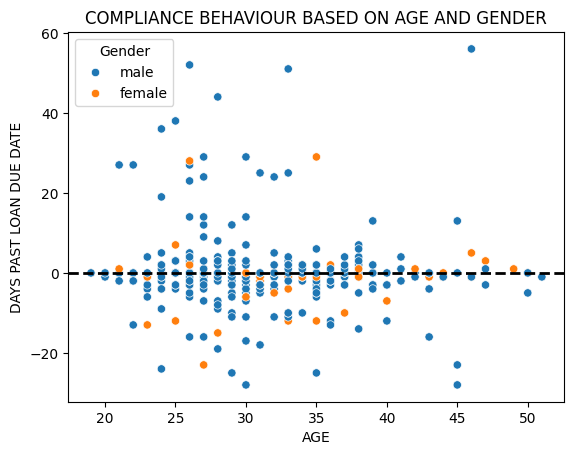

In [36]:
plt.Figure(figsize=(14,10))
sns.scatterplot(x="age",y="past_due_days",hue="Gender",data=loan_data)
plt.title("COMPLIANCE BEHAVIOUR BASED ON AGE AND GENDER")
plt.xlabel("AGE")
plt.ylabel("DAYS PAST LOAN DUE DATE")
plt.axhline(y=0, linewidth=2, color="k", linestyle='--')
plt.show()


VISUALISATION OF RELATIONSHIP BETWEEN NUMERICAL COLUMNS & CORRELATION ANALYSIS

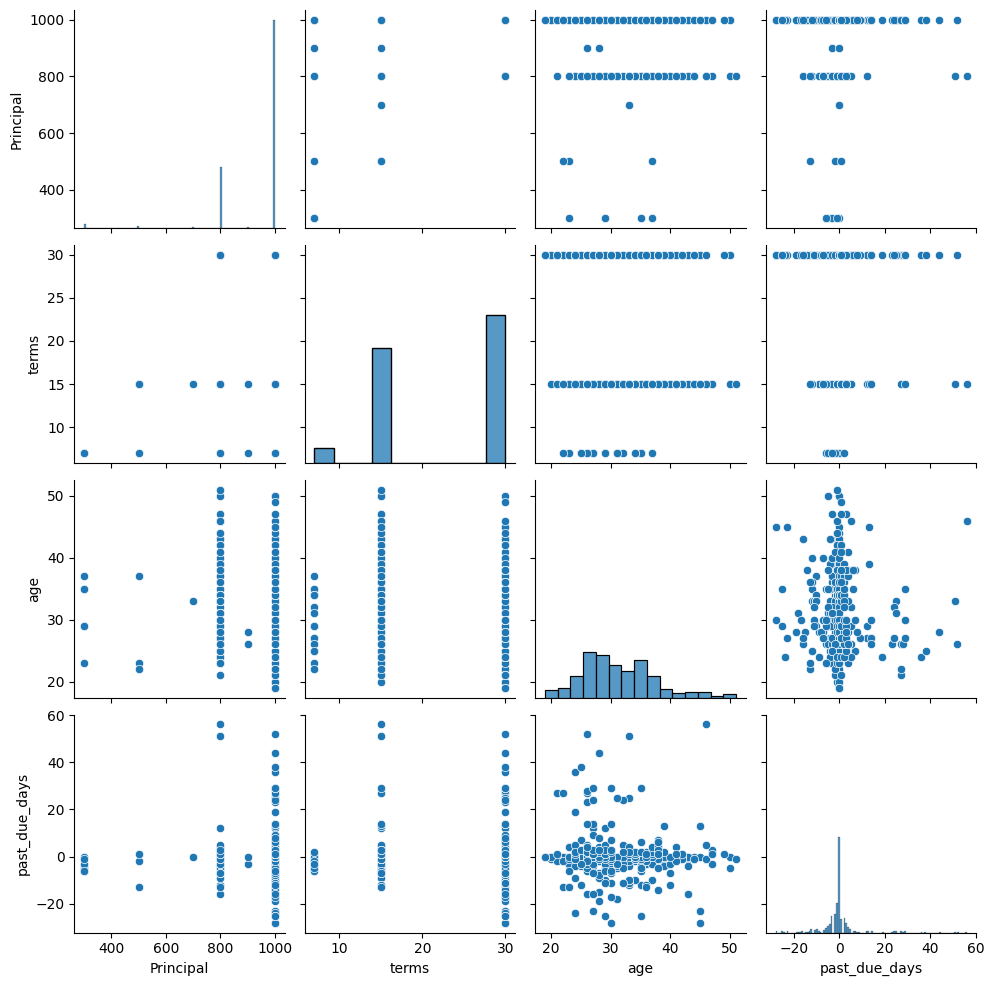

In [37]:
no_cols=["Principal","terms","age","past_due_days"]
sns.pairplot(loan_data[no_cols])

<Axes: >

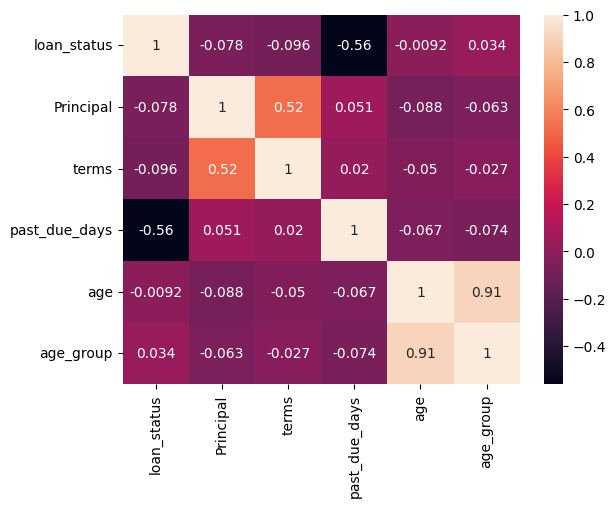

In [38]:
numerical_data=loan_data.select_dtypes(include=[np.number])
plt.Figure(figsize=(16,10))
sns.heatmap(numerical_data.corr(),annot=True)

columns i will use for machine learning


categorical columns = education , gender


numerical columns= principal,terms,age


our dependent variable= loan status


In [39]:
loan_data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'age_group'],
      dtype='object')

FEATURE SELECTION

In [40]:
loan_data=loan_data.drop(["effective_date","due_date","paid_off_time","age_group","Loan_ID"],axis=1)

In [41]:
loan_data.columns

Index(['loan_status', 'Principal', 'terms', 'past_due_days', 'age',
       'education', 'Gender'],
      dtype='object')

In [42]:
loan_data["education"]=loan_data["education"].map(lambda x: 0 if x == "High School or Below" 
                                                  else 1 if x == "college" 
                                                  else 2 if x == "Bechalor" else 3 )
loan_data["Gender"]=loan_data["Gender"].map(lambda x: 1 if x == "male" else 0)

In [43]:
y=loan_data["loan_status"]
X=loan_data.drop("loan_status",axis=1)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
print(X.shape)
print(y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(400, 6)
(400,)
(320, 6) (320,)
(80, 6) (80,)


In [46]:
y_train=y_train.astype(int)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)

Model selection

comparing classification algorithms

In [48]:
models = []
models.append(("Logistic Regression",LogisticRegression(max_iter=200)))
models.append(("Naive Bayes",GaussianNB()))   
models.append(("Decision Tree",DecisionTreeClassifier()))


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=None)
    cv_results = cross_val_score(model,x_train_scaled,y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

 

Logistic Regression: 0.900000 (0.053765)
Naive Bayes: 0.800000 (0.067315)
Decision Tree: 0.990625 (0.014321)


In [50]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
mse=mean_squared_error(y_test,predicted)
print("mean_squared_error:",mse)

mean_squared_error: 0.0


In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))


[[18  0]
 [ 0 62]]

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        62

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Regression models for complementation

In [53]:
X=loan_data.drop(columns="loan_status",axis=1)
y=loan_data["loan_status"]

In [54]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)


In [55]:
models = []
models.append(("KNN",KNeighborsRegressor()))
models.append(("Linear Regression", LinearRegression()))
models.append(("Decision Tree Regressor",DecisionTreeRegressor()))
models.append(("Lasso",Lasso()))
models.append(("Ridge",Ridge()))
models.append(("Elastic Net",ElasticNet()))


In [56]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=None)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring="neg_mean_squared_error")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

KNN: -0.070750 (0.018500)
Linear Regression: -0.129934 (0.022839)
Decision Tree Regressor: -0.009375 (0.014321)
Lasso: -0.138983 (0.019492)
Ridge: -0.129911 (0.022825)
Elastic Net: -0.131728 (0.019778)


In [57]:
loan_model= Lasso()
loan_model.fit(X_train,y_train)
predicted=loan_model.predict(X_test)
mse=mean_squared_error(y_test,predicted)
print(mse)

0.14361777539736523


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [67]:
numerical_cols = loan_data.select_dtypes(include=[np.number])
categorical_cols = loan_data.select_dtypes(exclude=[np.number])
numerical_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
categorical_transformer = Pipeline(steps=[("scaler",StandardScaler())])
column_transformer=ColumnTransformer(transformers=[("num",numerical_transformer,numerical_cols),( "cat",categorical_transformer,categorical_cols)])


In [68]:
model=RandomForestRegressor(n_estimators=100,random_state=0)

In [69]:
pipeline=Pipeline(steps=[("preprocessor",column_transformer),("model",model)])
pipeline.fit(X_train,y_train)
predicted=pipeline.predict(X_test)
mse=mean_squared_error(y_test,predicted)
print(mse)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed